<a href="https://colab.research.google.com/github/Dextinedsam79/AI-CLASS/blob/main/MNIST_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#@title Load Libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
plt.style.use("fivethirtyeight")

In [26]:
#@title Load Dataset
df_train = pd.read_csv("/content/sample_data/mnist_train_small.csv", header=None)
df_test = pd.read_csv("/content/sample_data/mnist_test.csv", header=None)


In [27]:
#@title Preview Data
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Label is: 7


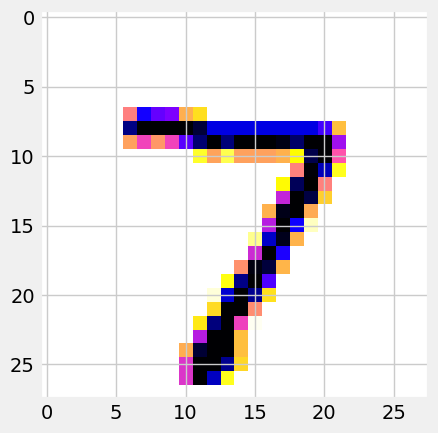

In [28]:
#@title Visualize Data
idx =0
sample = df_test.iloc[idx, 1:].values.reshape(28, 28)
label = df_test.iloc[idx, 0]
plt.imshow(sample, cmap="gnuplot2_r")
print(f"Label is: {label}")

In [29]:
#@title statistical Summary
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,20000.000000,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.0,20000.0,20000.0
mean,4.470200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215000,0.087700,0.036500,0.013650,0.032600,0.006000,0.0,0.0,0.0,0.0
std,2.892755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.314663,3.921566,2.712459,0.950794,2.718034,0.600318,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,253.000000,79.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [30]:
x_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values
x_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((20000, 784), (20000,), (10000, 784), (10000,))

In [31]:
#@title Encode Label
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [32]:
#@title Model Pipeline
model = Pipeline([
    ("scaler", MinMaxScaler()),
    ("pca", PCA(n_components=0.95)),
    ("knn", KNeighborsClassifier())
])

In [33]:
#@title Train Model
model.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=0.95)),
                ('knn', KNeighborsClassifier())])

In [34]:
#@title Evaluate Model
y_pred = model.predict(x_test)

In [35]:
#@title Accuracy
accuracy_score(y_test, y_pred)


0.961

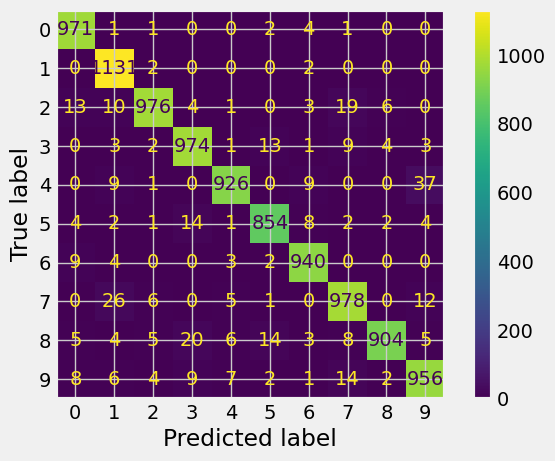

In [36]:
#@title Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_disp.plot()
plt.show()

In [37]:
#@title Save Model
pickle.dump(model, open("model.pkl", "wb"))